# Objetivo

El objetivo de esta actividad es desarrollar habilidades avanzadas en la visualización de datos utilizando histogramas y boxplots. Usaremos un dataset interesante de Kaggle para explorar la distribución de los datos y detectar cualquier valor atípico. Esta actividad te ayudará a entender mejor la distribución de los datos y cómo los valores atípicos pueden afectar tu análisis.

# Descripción del Ejercicio

En esta actividad, utilizaremos el dataset «World Happiness Report» de Kaggle, que contiene información sobre la felicidad en diferentes países del mundo. Este dataset incluye variables como el puntaje de felicidad, el PIB per cápita, la expectativa de vida saludable, la libertad, la generosidad, entre otras.

Puedes descargar el dataset desde el siguiente enlace: https://www.kaggle.com/datasets/unsdsn/world-happiness

# **Instrucciones**

1. Cargar y Explorar los Datos:
* Descarga el dataset y cárgalo en un DataFrame de Pandas.
* Realiza una exploración inicial de los datos para entender las variables disponibles.
2. Crear Histogramas:
* Crea histogramas para las variables Score, GDP per capita, Healthy life expectancy y Freedom to make life choices.
* Personaliza los histogramas con colores, bordes y ajustes de transparencia.
3. Crear Boxplots:
* Crea boxplots para las mismas variables para visualizar la mediana, el rango intercuartil y los valores atípicos.
* Personaliza los boxplots con diferentes colores y estilos.
4. Análisis Combinado:
* Combina los histogramas y los boxplots en una sola figura para cada variable.
* Interpreta los resultados y escribe un análisis sobre la distribución de cada variable y la presencia de valores atípicos.




# **Análisis Esperado**

Al completar la actividad, debes escribir un análisis detallado sobre la distribución de las variables y la presencia de valores atípicos. Por ejemplo:

1. Distribución del Puntaje de Felicidad:
* El histograma muestra que la mayoría de los países tienen un puntaje de felicidad entre 4 y 7.
* El boxplot revela algunos valores atípicos con puntajes muy altos o muy bajos, indicando países con niveles de felicidad extremadamente altos o bajos.
2. Distribución del PIB per Cápita:
* El histograma muestra una distribución sesgada hacia la derecha, lo que indica que la mayoría de los países tienen un PIB per cápita bajo, con algunos países con PIB per cápita muy alto.
* El boxplot confirma la presencia de valores atípicos en la cola derecha de la distribución.
3. Distribución de la Expectativa de Vida Saludable:
* El histograma muestra una distribución relativamente simétrica con un pico alrededor de los 65 años.
* El boxplot muestra algunos valores atípicos en ambos extremos, lo que indica variabilidad en la expectativa de vida saludable entre diferentes países.
4. Distribución de la Libertad para Tomar Decisiones de Vida:
* El histograma muestra una distribución sesgada hacia la derecha, similar a la del PIB per cápita.
* El boxplot revela varios valores atípicos, indicando que en algunos países la libertad para tomar decisiones de vida es significativamente diferente de la mayoría.

In [1]:
# Importar las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar dataset
df15 = pd.read_csv('/content/2015.csv')
df16 = pd.read_csv('/content/2016.csv')
df17 = pd.read_csv('/content/2017.csv')
df18 = pd.read_csv('/content/2018.csv')
df19 = pd.read_csv('/content/2019.csv')

## Análisis
Al momento de revisar el link de Kaggle hay varios csv, así que se debe revisar si al menos tienen el mismo número de columnas, o tipos de datos para poder juntarlos

In [3]:
# Comprobar el tamaño (filas y columnas) de cada dataframe
print("Tamaño de 2015:", df15.shape)
print("Tamaño de 2016:", df16.shape)
print("Tamaño de 2017:", df17.shape)
print("Tamaño de 2018:", df18.shape)
print("Tamaño de 2019:", df19.shape)

# Verificar si todas las columnas son iguales en los df que tienen misma cantidad de columnas
print("\n¿Las columnas de todos los archivos son iguales?")
print("2015 y 2017:", set(df15.columns) == set(df17.columns))
print("2018 y 2019:", set(df18.columns) == set(df19.columns))

Tamaño de 2015: (158, 12)
Tamaño de 2016: (157, 13)
Tamaño de 2017: (155, 12)
Tamaño de 2018: (156, 9)
Tamaño de 2019: (156, 9)

¿Las columnas de todos los archivos son iguales?
2015 y 2017: False
2018 y 2019: True


## Análisis
Los dataset tienen diferente números de columnas, y al revisar aquellos que tienen mismo número de columnas, solo se puede decir que el el año 2018 y 2019 tienen el mimsmo número de columnas y el mismo nombre, así que estas se podrían juntar, además no tienen datos nulos

In [4]:
print(df15.info())
print(df16.info())
print(df17.info())
print(df18.info())
print(df19.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df18['Year'] = 2018
df19['Year'] = 2019

In [6]:
# Concatenar df18 y df19 por filas
df = pd.concat([df18, df19], ignore_index=True)

# Verificar el resultado
print(df.shape)  # Muestra el tamaño (filas, columnas)

(312, 10)


## Análisis
A los df18 y df19 se les añadió la columna del año, con su respectivo valor, se juntaron en un solo df y al revisar su tamaño, es correcto a lo visto previamente


# **1) Cargar y explorar datos**

Ya los datos se encuentran cargados

Así que se procede a hacer una exploración inicial


In [7]:
for column in df.columns:
    print(f"\nConteo de valores únicos en la columna '{column}':")
    print(df[column].value_counts().sort_index())


Conteo de valores únicos en la columna 'Overall rank':
Overall rank
1      2
2      2
3      2
4      2
5      2
      ..
152    2
153    2
154    2
155    2
156    2
Name: count, Length: 156, dtype: int64

Conteo de valores únicos en la columna 'Country or region':
Country or region
Afghanistan    2
Albania        2
Algeria        2
Angola         1
Argentina      2
              ..
Venezuela      2
Vietnam        2
Yemen          2
Zambia         2
Zimbabwe       2
Name: count, Length: 160, dtype: int64

Conteo de valores únicos en la columna 'Score':
Score
2.853    1
2.905    1
3.083    2
3.203    1
3.231    1
        ..
7.555    1
7.594    1
7.600    1
7.632    1
7.769    1
Name: count, Length: 295, dtype: int64

Conteo de valores únicos en la columna 'GDP per capita':
GDP per capita
0.000    2
0.024    1
0.026    1
0.046    1
0.069    1
        ..
1.576    1
1.609    1
1.649    1
1.684    1
2.096    1
Name: count, Length: 276, dtype: int64

Conteo de valores únicos en la columna 

In [8]:
print(df.info())
print(df.describe().round(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   Year                          312 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB
None
       Overall rank   Score  GDP per capita  Social support  \
count        312.00  312.00          312.00          312

##Análisis
Parece que la mayoría de datos si bien son flotantes, tienen cara de ser algún tipo de valoración estandarizada

# **2) Histogramas**

Dado que algunas de las variables requeridas, solamente los dataframe del 2018 y 2019 tienen estas, así que se trabajara con estas o con el df generado

Además me pareció interesante traslapar los dos gráficos (los dos años)

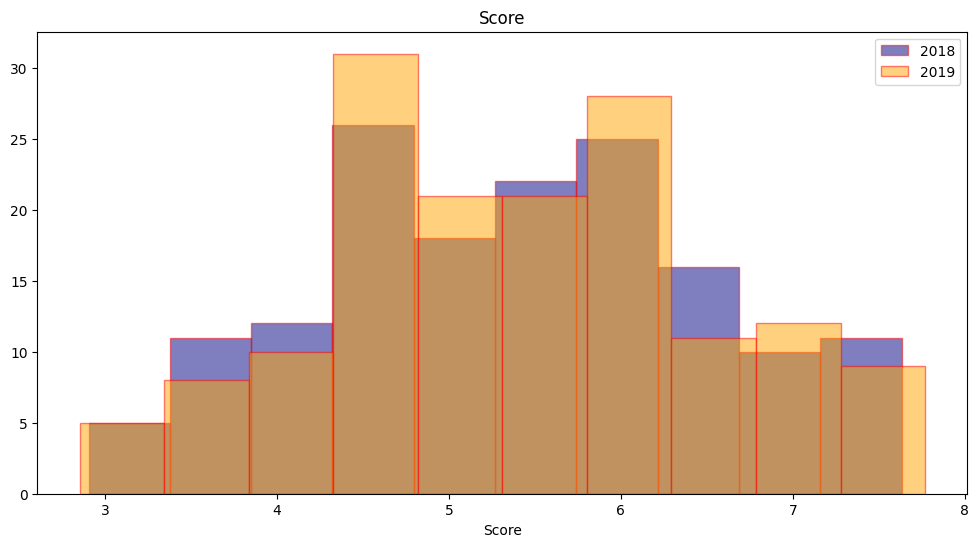

In [13]:
# Histograma para Score
plt.figure(figsize=(12, 6))
plt.hist(df18['Score'], bins=10, edgecolor='red', alpha=0.5, color='navy', label='2018')
plt.hist(df19['Score'], bins=10, edgecolor='red', alpha=0.5, color='orange', label='2019')

plt.title("Score")
plt.xlabel("Score")
plt.legend()

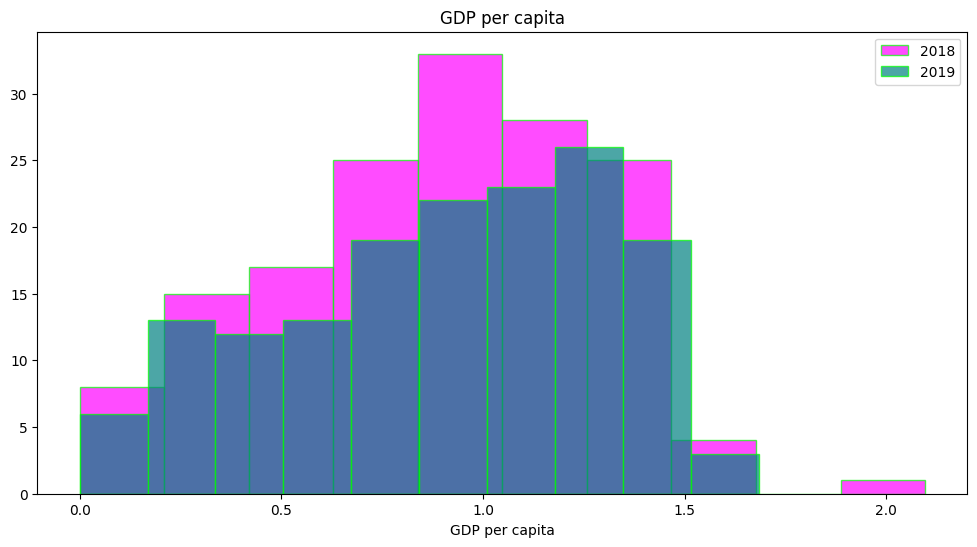

In [17]:
# Histograma para GDP per capita
plt.figure(figsize=(12, 6))
plt.hist(df18['GDP per capita'], bins=10, edgecolor='lime', alpha=0.7, color='magenta', label='2018')
plt.hist(df19['GDP per capita'], bins=10, edgecolor='lime', alpha=0.7, color='teal', label='2019')

plt.title("GDP per capita")
plt.xlabel("GDP per capita")
plt.legend()

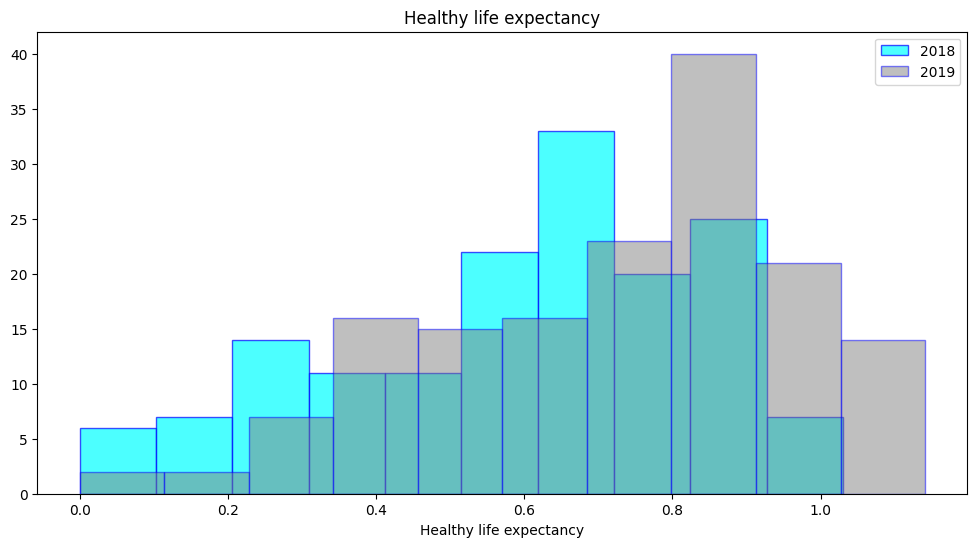

In [18]:
# Histograma para Healthy life expectancy
plt.figure(figsize=(12, 6))
plt.hist(df18['Healthy life expectancy'], bins=10, edgecolor='blue', alpha=0.7, color='cyan', label='2018')
plt.hist(df19['Healthy life expectancy'], bins=10, edgecolor='blue', alpha=0.5, color='gray', label='2019')

plt.title("Healthy life expectancy")
plt.xlabel("Healthy life expectancy")
plt.legend()

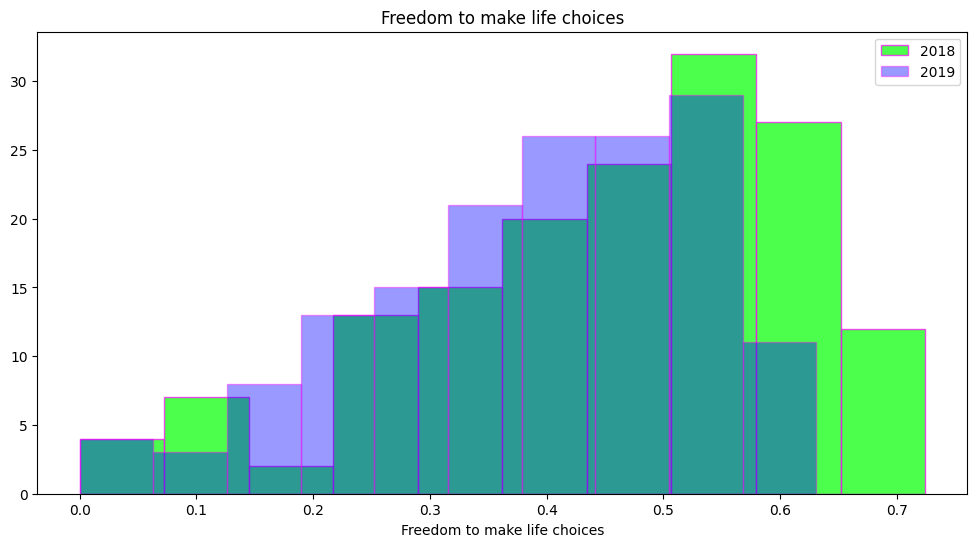

In [22]:
# Histograma para Freedom to make life choices
plt.figure(figsize=(12, 6))
plt.hist(df18['Freedom to make life choices'], bins=10, edgecolor='magenta', alpha=0.7, color='lime', label='2018')
plt.hist(df19['Freedom to make life choices'], bins=10, edgecolor='magenta', alpha=0.4, color='blue', label='2019')

plt.title("Freedom to make life choices")
plt.xlabel("Freedom to make life choices")
plt.legend()

##Análisis
1. En el Score, la mayor frecuencia de los datos se encuentra alrededor de 4,5 y en 6 para los dos años, similar a las menores frecuencias están por un valor de Score aproximadamente de 3,5 hacía abajo

2. Al observar GDP per capita, lo primero es que pareciera que, en el 2018 hubiera habido más datos u observaciones que en el 2019 (pese a que la cantidad de filas es la misma y no había datos nulos), esto lo puedo decir porque, en general, las barras del 2018 siempre son más altas que las del 2019, lo que no sucede con el histograma del Score, donde hay intercalación, en una barra del Score el 2018 es más alto que el 2019, pero en algunas otras es al contrario.
También en GDP per capita la mayor frecuencia de datos estaba alrededor de un valor de 1.0 para el año 2018, mientras que para el año 2019 la mayor frecuencia se dio aproximadamente a 1.3, a simple vista pareciera un aumento significativo, ya que la escala de valores de esta variable va de 0.0 a 2.0.

3. Por otro lado, la variable Healthy life expectancy tiene una escala de valores de 0.0 a 1.0, donde la menor frecuencia se dio entre 0.0 y 0.2 para los dos años, pero las mayores frecuencias si fueron diferentes, para el año 2018 fue alrededor de 0.7, mientras que para el 2019 fue alrededor de 0.9.

4. Finalmente en la variable Freedom to make life choices, los valores de frecuencia más altos se mantienen entre 0.5 y 0.6, pero a diferencia del 2018 que tuvo un comportamiento suave en los datos para dicho valor más alto, en el 2019 se observa un crecimiento constante hasta el valor más alto y después una caída pronunciada en la frecuencia, lo que podría indicar que comparado con el 2019, en el 2018 esta variable tenía mayor importancia.


# **3) Crear Boxplots:**
En este punto revisé si graficar cada df por separado (de los dos años) era viable, pero logré graficar las variables puntuales enfrentadas por años, y que me diera los dos bloxplot, y así usar el df unido

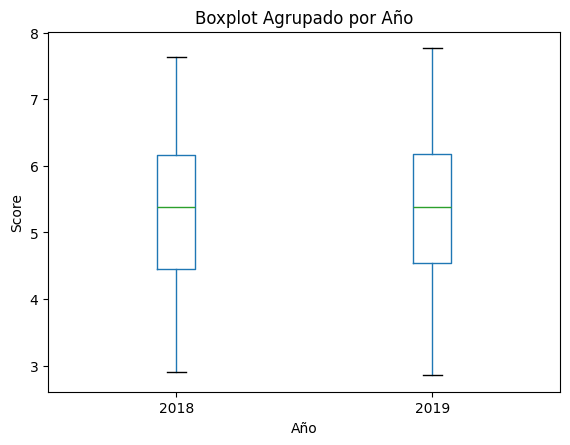

In [ ]:
# Boxplot para Score
df.boxplot(column='Score', by='Year', vert=True)

# Añadir título y etiquetas
plt.title("Boxplot Agrupado por Año")
plt.suptitle('')  # Eliminar el título por defecto generado por 'by'
plt.xlabel("Año")
plt.ylabel("Score")

#Quitar el grid
plt.grid(False)

# Mostrar el gráfico
plt.show()

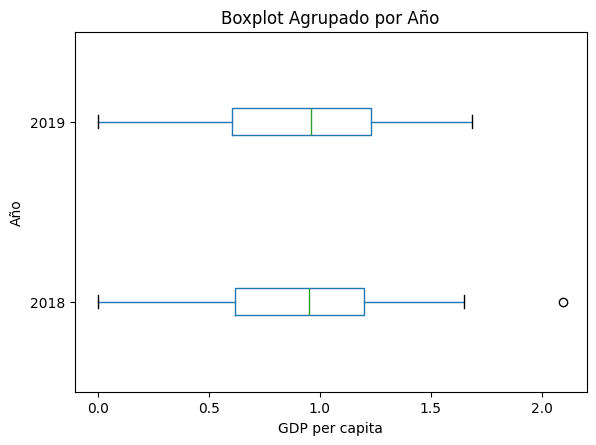

In [ ]:
# Boxplot para GDP per capita
df.boxplot(column='GDP per capita', by='Year', vert=False)

# Añadir título y etiquetas
plt.title("Boxplot Agrupado por Año")
plt.suptitle('')  # Eliminar el título por defecto generado por 'by'
plt.xlabel("GDP per capita")
plt.ylabel("Año")

#Quitar el grid
plt.grid(False)

# Mostrar el gráfico
plt.show()

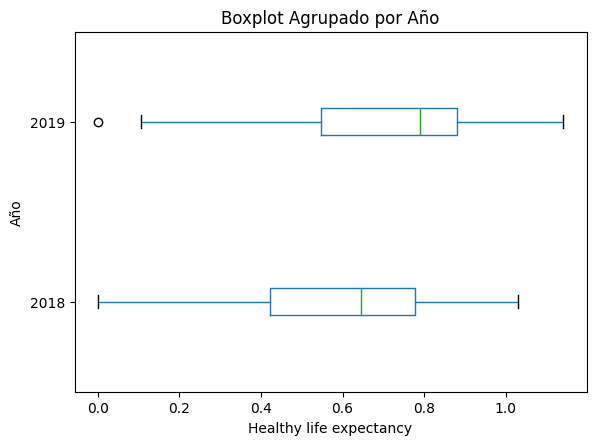

In [ ]:
# Boxplot para Healthy life expectancy
df.boxplot(column='Healthy life expectancy', by='Year', vert=False)

# Añadir título y etiquetas
plt.title("Boxplot Agrupado por Año")
plt.suptitle('')  # Eliminar el título por defecto generado por 'by'
plt.xlabel("Healthy life expectancy")
plt.ylabel("Año")

#Quitar el grid
plt.grid(False)

# Mostrar el gráfico
plt.show()

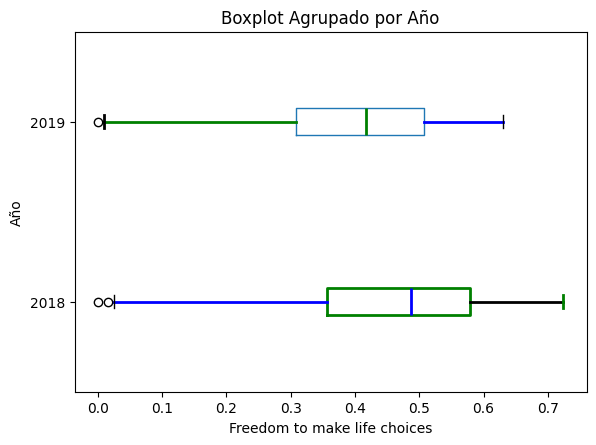

In [24]:
# Este fue creado con la ayuda de ChatGPT porque algunas de las cosas que tenía en mis notas y colabs de estudio no me estaban funcionando, y parece que era por como están cargados los datos
# Crear el boxplot utilizando pandas
ax = df.boxplot(column='Freedom to make life choices', by='Year', vert=False)

# Personalizar el boxplot
for patch in ax.artists:  # Para cambiar el color de las cajas
    patch.set_facecolor('lightcoral')  # Color de la caja
    patch.set_linewidth(2)  # Grosor del borde de la caja

for whisker in ax.lines[::4]:  # Para cambiar los bigotes
    whisker.set_color('green')  # Color de los bigotes
    whisker.set_linewidth(2)  # Grosor de los bigotes

for cap in ax.lines[1::4]:  # Para cambiar las "tapitas" de los bigotes
    cap.set_color('blue')  # Color de las "tapitas"
    cap.set_linewidth(2)  # Grosor de las "tapitas"

for flier in ax.artists:  # Para cambiar los outliers
    flier.set_markerfacecolor('red')  # Color de los outliers
    flier.set_marker('o')  # Forma de los outliers
    flier.set_alpha(0.5)  # Transparencia de los outliers
    flier.set_markersize(8)  # Tamaño de los outliers

for median in ax.lines[2::4]:  # Para cambiar la línea de la mediana
    median.set_color('black')  # Color de la mediana
    median.set_linewidth(2)  # Grosor de la mediana

# Eliminar el título por defecto generado por 'by'
plt.title("Boxplot Agrupado por Año")
plt.suptitle('')

# Quitar el grid
plt.grid(False)

# Añadir etiquetas
plt.xlabel("Freedom to make life choices")
plt.ylabel("Año")

# Mostrar el gráfico
plt.show()


##Análisis
1. A primer vistazo, pareciera que variables como Score y GDP per capita, hubieran tenido el mismo comportamiento en los dos años, a excepción de un valor atípico por encima en GDP per capita para el año 2018

2. En Score, la mediana de los datos fue alrededor de 5.5, con un q1 aproximado en 4.5 y un q3 alrededor de 6.0. Y en GDP per capita la mediana fue cercana a 1, con un q1 entre 0.5 y 0.75, y un q3 entre 1.0 y 1.25

3. En el caso de la variable Healthy life expectancy la mediana para el 2019 fue cercana a 0.8, mientras que en el 2018 fue entre 0.6 y 0.7, también se presenta un valor atípico por debajo para el año 2019 en esta variable, y los datos tienden a verse más concentrados (barras del rango intercuartílico (IQ)) en el año 2019 comparado con el año 2019, lo que podría sugerir los datos estuvieron más concentrados en dichos valores, para el 2019 el q1 estuvo entre 0.5 y 0.6 y el q3 entre 0.8 y 0.9.

4. Por último, la variable Freedom to make life choices, mostró valores atípicos por debajo para ambos años, y se ve claramente que el valor máximo, el q3, el q2 o mediana y el q3, y el valor mínimo, son menores en el 2019 comparados con el 2018.


# **4) Análisis Combinados:**

Aquí busqué documentación y varias páginas y hasta vídeos de Youtube, y según vi, lo mejor en estos casos es manejar varios gráficos como subgráficos

También preferí dejar la grilla para ver mejor algunos valores

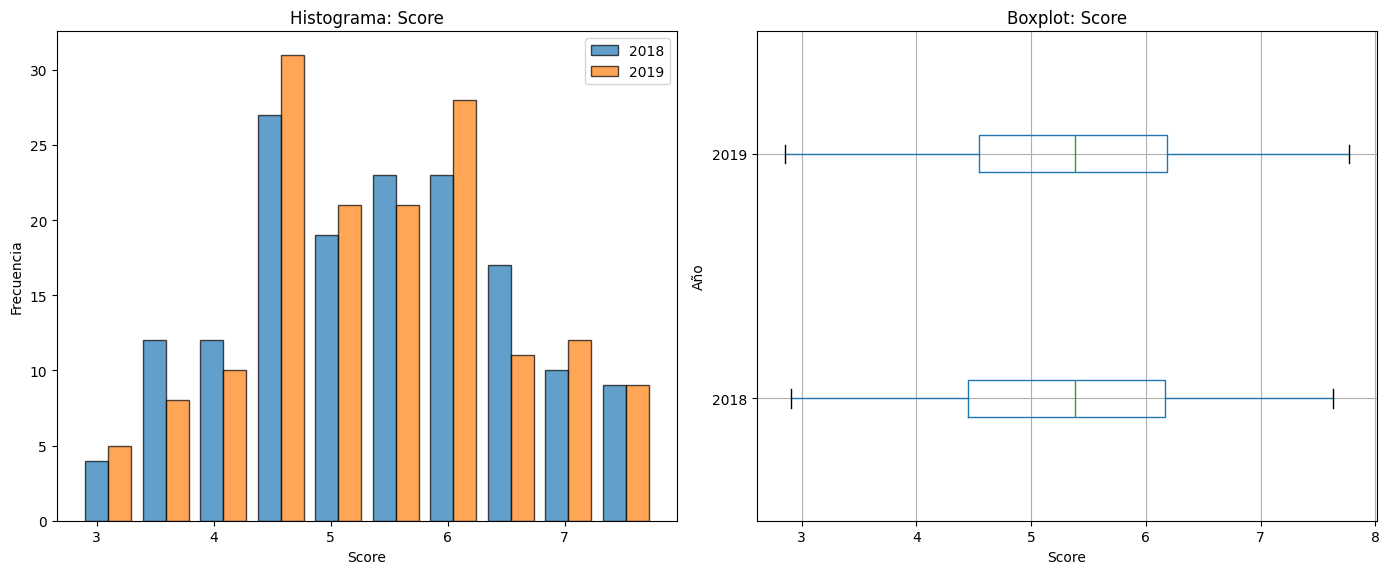

In [29]:
# Score subgráficos (uno para histograma y otro para boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma en el primer subgráfico
axes[0].hist([df18['Score'], df19['Score']],
             bins=10, edgecolor='black', alpha=0.7, label=['2018', '2019'])
axes[0].set_title("Histograma: Score")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Boxplot en el segundo subgráfico
df.boxplot(column='Score', by='Year', vert=False, ax=axes[1])
axes[1].set_title("Boxplot: Score")
axes[1].set_xlabel("Score")
axes[1].set_ylabel("Año")
axes[1].get_xaxis().tick_bottom()

# Eliminar el título por defecto generado por 'by'
plt.suptitle('')  # Eliminar el título por defecto generado por pandas

# Mostrar la figura
plt.tight_layout() # para ajustar automáticamente el espaciado entre subplots
plt.show()

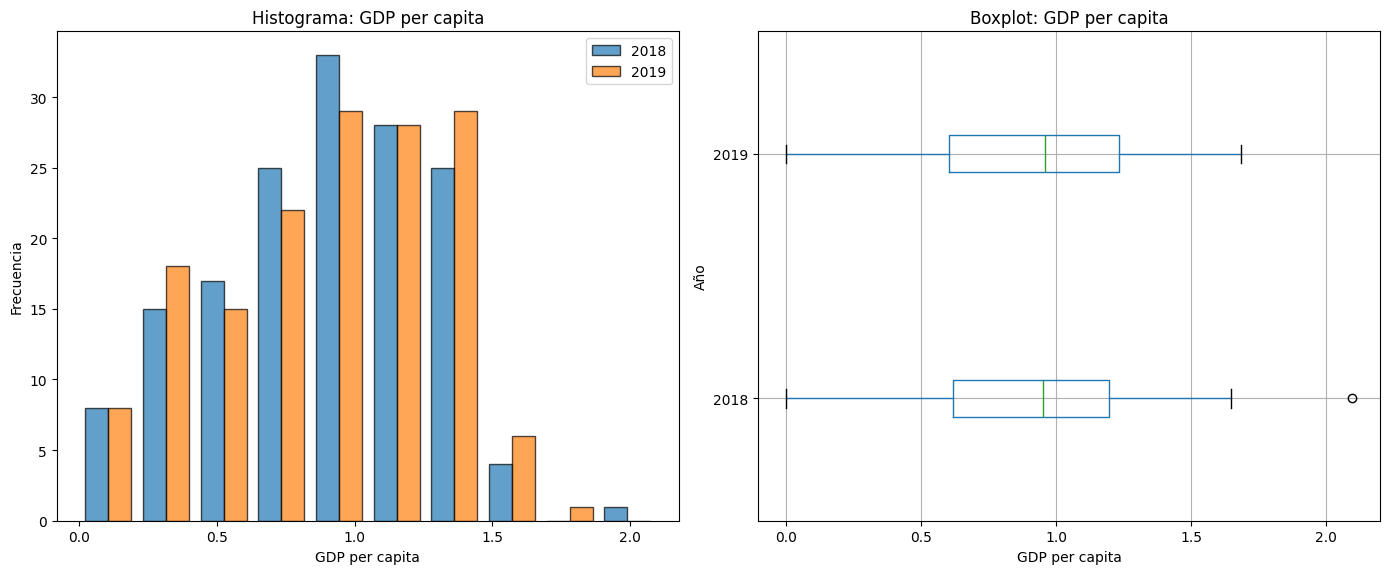

In [30]:
# GDP per capita subgráficos (uno para histograma y otro para boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma en el primer subgráfico
axes[0].hist([df18['GDP per capita'], df19['GDP per capita']],
             bins=10, edgecolor='black', alpha=0.7, label=['2018', '2019'])
axes[0].set_title("Histograma: GDP per capita")
axes[0].set_xlabel("GDP per capita")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Boxplot en el segundo subgráfico
df.boxplot(column='GDP per capita', by='Year', vert=False, ax=axes[1])
axes[1].set_title("Boxplot: GDP per capita")
axes[1].set_xlabel("GDP per capita")
axes[1].set_ylabel("Año")
axes[1].get_xaxis().tick_bottom()

# Eliminar el título por defecto generado por 'by'
plt.suptitle('')  # Eliminar el título por defecto generado por pandas

# Mostrar la figura
plt.tight_layout() # para ajustar automáticamente el espaciado entre subplots
plt.show()

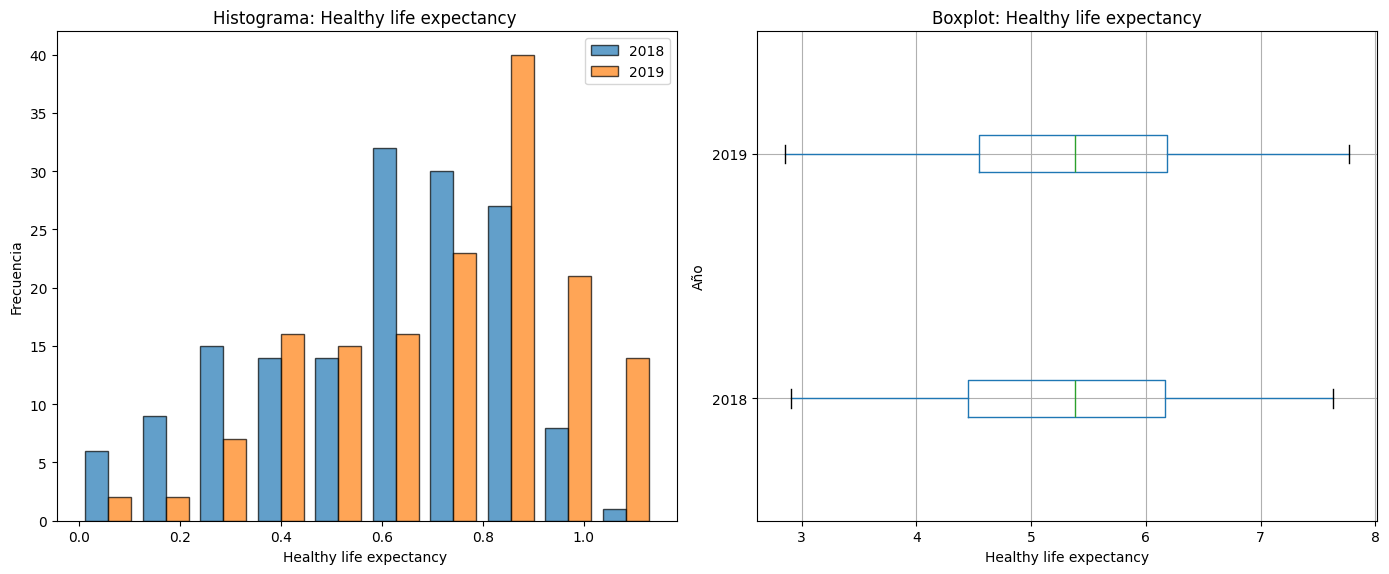

In [31]:
# Healthy life expectancy  subgráficos (uno para histograma y otro para boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma en el primer subgráfico
axes[0].hist([df18['Healthy life expectancy'], df19['Healthy life expectancy']],
             bins=10, edgecolor='black', alpha=0.7, label=['2018', '2019'])
axes[0].set_title("Histograma: Healthy life expectancy ")
axes[0].set_xlabel("Healthy life expectancy ")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Boxplot en el segundo subgráfico
df.boxplot(column='Score', by='Year', vert=False, ax=axes[1])
axes[1].set_title("Boxplot: Healthy life expectancy")
axes[1].set_xlabel("Healthy life expectancy")
axes[1].set_ylabel("Año")
axes[1].get_xaxis().tick_bottom()

# Eliminar el título por defecto generado por 'by'
plt.suptitle('')  # Eliminar el título por defecto generado por pandas

# Mostrar la figura
plt.tight_layout() # para ajustar automáticamente el espaciado entre subplots
plt.show()

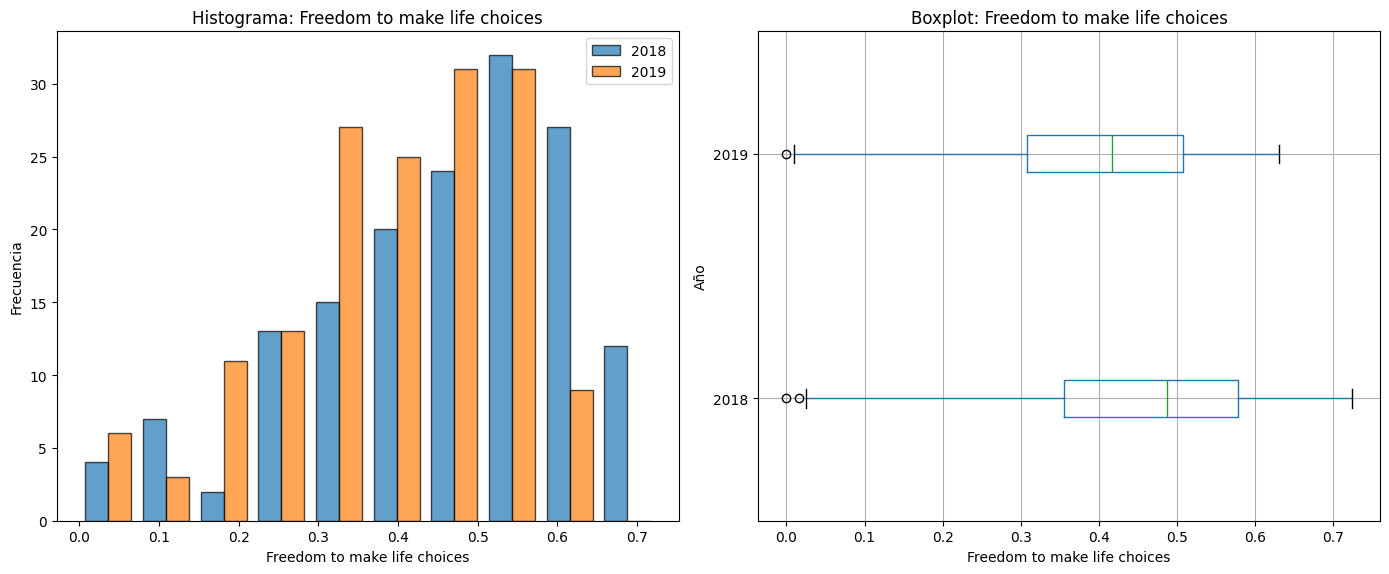

In [32]:
# Freedom to make life choices subgráficos (uno para histograma y otro para boxplot)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histograma en el primer subgráfico
axes[0].hist([df18['Freedom to make life choices'], df19['Freedom to make life choices']],
             bins=10, edgecolor='black', alpha=0.7, label=['2018', '2019'])
axes[0].set_title("Histograma: Freedom to make life choices")
axes[0].set_xlabel("Freedom to make life choices")
axes[0].set_ylabel("Frecuencia")
axes[0].legend()

# Boxplot en el segundo subgráfico
df.boxplot(column='Freedom to make life choices', by='Year', vert=False, ax=axes[1])
axes[1].set_title("Boxplot: Freedom to make life choices")
axes[1].set_xlabel("Freedom to make life choices")
axes[1].set_ylabel("Año")
axes[1].get_xaxis().tick_bottom()

# Eliminar el título por defecto generado por 'by'
plt.suptitle('')  # Eliminar el título por defecto generado por pandas

# Mostrar la figura
plt.tight_layout() # para ajustar automáticamente el espaciado entre subplots
plt.show()

##Análisis
1. Score: Si bien pareciera haber diferencias en la distribución de las frecuencias por el año con los histogramas, en sus estadísticos dados en el boxplot se puede apreciar que los datos son muy similares, por lo que podría suponer que no hay un cambio importante o significativo en esta variable.

2. GDP per capita:  Si bien hay una especie de distribución similar en los datos, la mayoría de estos se concentran entre 0.0 y alrededor de 1.5, ya con datos atípicos en el 2018 por encima de 2.0 (según el boxplot, porque según el histograma dicho valor estaría alrededor de 2.0 o incluso un poco menos),

3. Healthy life expectancy: Aunque los estadísticos dados por el boxplot sugieren que no hay grandes cambios en esta variable, porque incluso muchos de sus valores son iguales para ambos años, el histograma si refleja que las mayores frecuencias se dieron en el 2019, y en valor respecto a la variable, también fue este año con valores cercanos a 0.9, mientras que en 2018 fueron entre 0.6 a 0.8.

4. Freedom to make life choices: Si bien es posible observar similitud en el histograma de ambos años, el 2019 presenta mayor distribución entre 0.3 y 0.5, y después una caída, lo cual en el boxplot puede verse reflejado ya que el valor máximo y otros estadísticos suelen ser menor en este año comparados con el 2018.


#Consideración final... No tiene que ver con el Core
Los siguientes links, me parecieron interesantes

Son código de este dataset que otras personas han desarrollado

Me parece que una muy buena forma de aprender y ver que o como hacer algo, es leyendo código... En el primero hay demasiado código, y me pareció bastante interesante algunos gráficos y análisis, en el segundo hay un mapa muy pero bastante hermoso y poderoso para aprender a hacerlo


demasiado código
https://www.kaggle.com/code/jacopoferretti/world-happiness-score-eda-statistics

mapa bien interesante
https://www.kaggle.com/code/dimansinghahirwar/eda-world-happiness-index